# Data exploration


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [15]:
wna_data = pd.read_csv('../data/p2_fmt_wNA.csv',sep='\t')
wna_data.iloc[:,2:] = wna_data.iloc[:,2:].add(1).fillna(0) # 填补0并将所有值+1
wna_data

,#CHROM,POS,K10G,K12G,K13G,K16G,K21G,K23G,K25G,K28G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
0,EGOHCJCO_00001,174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0
1,EGOHCJCO_00001,184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0
2,EGOHCJCO_00003,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0
3,EGOHCJCO_00006,297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,EGOHCJCO_00006,342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124458,KMKHEIEB_02137,387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124459,KMKHEIEB_02144,443,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124460,KMKHEIEB_02144,471,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124461,KMKHEIEB_02144,473,0.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from scipy.sparse import csr_matrix

A = wna_data.iloc[:,2:].values
A = csr_matrix(A)

B = wna_data.iloc[:,2:].values.T
B = csr_matrix(B)

# 进行稀疏矩阵点乘
C = A.dot(B)

: 

In [34]:
from scipy.sparse.linalg import svds
import scipy.sparse
from scipy.sparse import csr_matrix

A = wna_data.iloc[:,2:]

# 进行SVD分解
k = 1000
U, s, VT = svds(A, k)
# s = np.reshape(s, [k, 1])
print(U.shape, s.shape, VT.shape)
# 计算AA^T的特征值和特征向量
S = np.diag(s) ** 2
print(U.T.shape, S.shape, U.shape)
eigvals, eigvecs = np.linalg.eigh(np.dot(U, np.dot(S, U.T)))

# 输出结果
# print("AA^T的特征值：", eigvals)
# print("AA^T的特征向量：", eigvecs)

TypeError: type not understood

In [12]:
data = np.array(wna_data.iloc[:,2:])
dot_result = np.dot(data,data.T)
dot_result.shape

: 

In [4]:
U, s, VT = np.linalg.rSVD(wna_data.iloc[:100,2:])
print(U.shape, s.shape, VT.shape)

(100, 100) (90,) (90, 90)


In [14]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# 定义一个稀疏矩阵
A = wna_data.iloc[:,2:]
# A[A < 0.9] = 0

# 进行SVD分解
svd = TruncatedSVD(n_components=90)
U = svd.fit_transform(A)
s = svd.singular_values_
VT = svd.components_

# 输出结果
print(U.shape, s.shape, VT.shape)
# print("U: ", U)
# print("s: ", s)
# print("VT: ", VT)

(124463, 90) (90,) (90, 90)


In [1]:
wna_data.iloc[:,2:] * wna_data.iloc[:,2:].T

NameError: name 'wna_data' is not defined

In [6]:
import numpy as np


# 计算特征向量和特征值
eigenvalues, eigenvectors = np.linalg.eig(np.array(wna_data.iloc[:,2:]))

# 输出特征向量和特征值
print("特征值：", eigenvalues)
print("特征向量：", eigenvectors)



LinAlgError: Last 2 dimensions of the array must be square

In [82]:
region = pd.read_csv('../data/id_region.txt',sep='\t')
region.head()

,Id,region1,region2
0,K10G,KA,KA
1,K12G,KA,KA
2,K13G,KA,KA
3,K16G,KA,KA
4,K21G,KA,KA


## 1. sparse PCA


In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn import random_projection

In [106]:
# random projection
transformer = random_projection.GaussianRandomProjection(n_components=1000)
wna_data_projected = transformer.fit_transform(wna_data.iloc[:,2:].T)
print(wna_data_projected.shape) 

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wna_data_projected)

cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

(90, 1000)
cumulative variance explained: 62.96%


Text(0.5, 1.0, 'PCA')

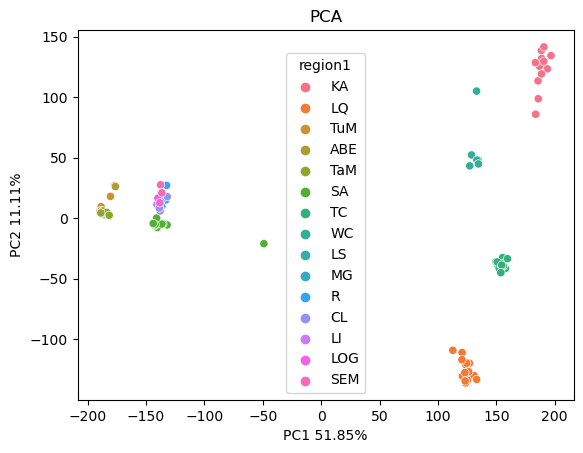

In [107]:
pca_region = pd.concat([region,pd.DataFrame(pca_result,columns=['pc1','pc2'])],axis=1)
sns.scatterplot(data=pca_region, x="pc1", y="pc2", hue="region1")
plt.xlabel(f"PC1 {pca.explained_variance_ratio_[0]:.02%}")
plt.ylabel(f"PC2 {pca.explained_variance_ratio_[1]:.02%}")
plt.title('PCA')